<>:101: SyntaxWarning: invalid escape sequence '\p'
<>:101: SyntaxWarning: invalid escape sequence '\p'
C:\Users\rvshi\AppData\Local\Temp\ipykernel_13152\1534140399.py:101: SyntaxWarning: invalid escape sequence '\p'
  csv_path = "problems\problems\isolated.csv"
C:\Users\rvshi\AppData\Local\Temp\ipykernel_13152\1534140399.py:34: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  return np.abs(np.cross(line_direction, point - line_point) / np.linalg.norm(line_direction))


Symmetry line direction: [ 0.99903212 -0.04398653]
Perpendicular line direction: [0.04398653 0.99903212]
A point on the symmetry line: [136.67573383 185.32582203]


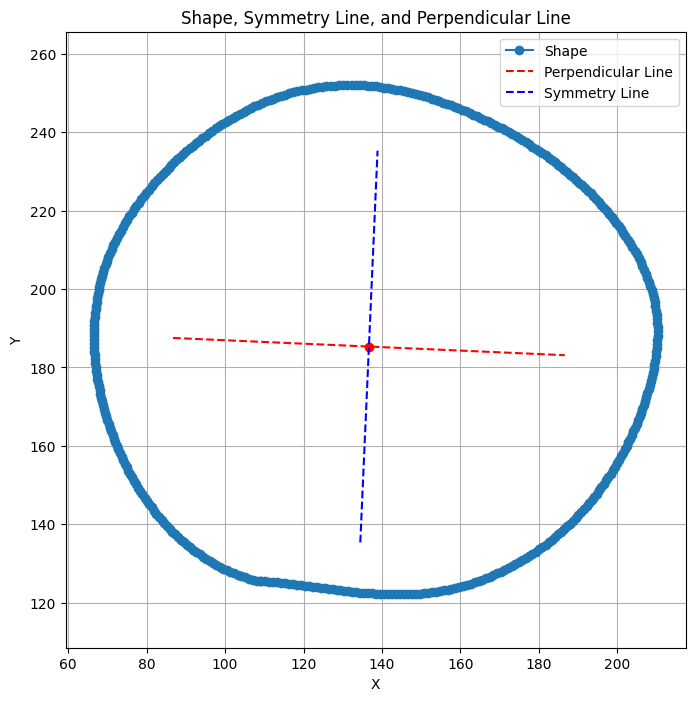

Symmetry line direction: [ 0.99536393 -0.09618031]
Perpendicular line direction: [0.09618031 0.99536393]
A point on the symmetry line: [191.98106037  64.77437599]


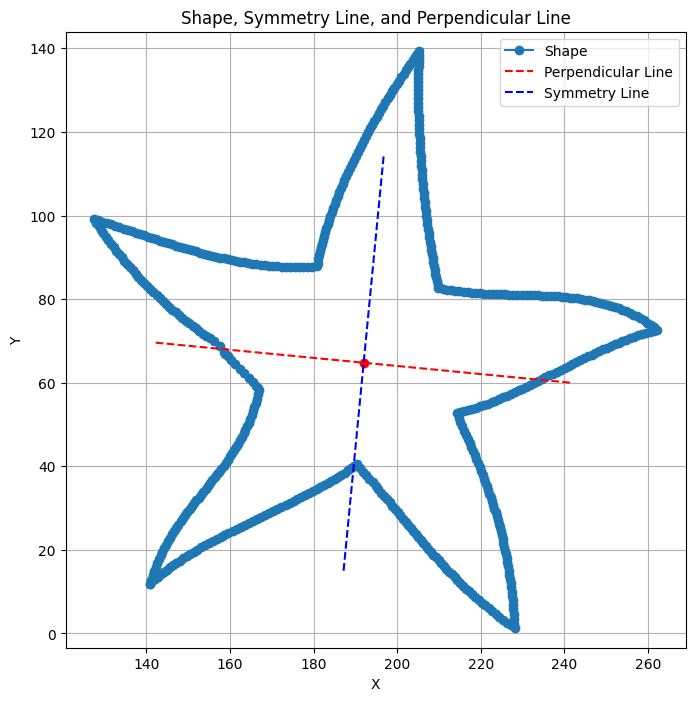

Symmetry line direction: [0.99727761 0.07373854]
Perpendicular line direction: [-0.07373854  0.99727761]
A point on the symmetry line: [55.02373199 59.67612427]


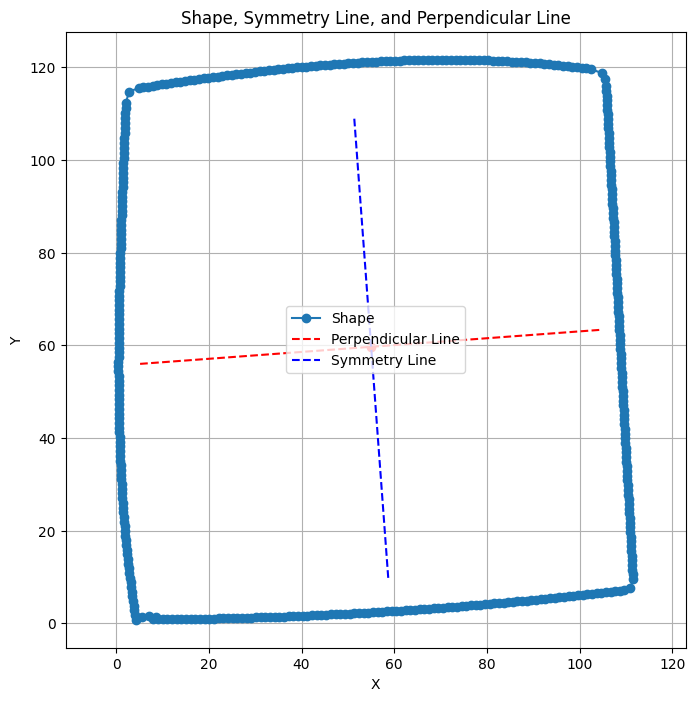

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def read_csv(csv_path):
    """
    Read shape data from a CSV file and organize it into a list of paths, 
    where each path is a list of points representing a shape.
    """
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:3]  # Corrected slice operation
            XYs.append(XY)
        path_XYs.append(np.vstack(XYs))
    
    return path_XYs

def calculate_centroid(points):
    """
    Calculate the centroid of a shape given its points.
    """
    return np.mean(points, axis=0)

def distance_to_line(point, line_point, line_direction):
    """
    Calculate the perpendicular distance from a point to a line.
    The line is defined by a point on the line and a direction vector.
    """
    return np.abs(np.cross(line_direction, point - line_point) / np.linalg.norm(line_direction))

def symmetry_loss(params, points, centroid):
    """
    Calculate the loss function for symmetry.
    """
    angle, intercept = params
    direction = np.array([np.cos(angle), np.sin(angle)])
    
    distances = [distance_to_line(p, centroid + intercept * direction, direction) for p in points]
    return np.std(distances)  # Minimize the standard deviation of distances

def find_symmetry_line(points):
    """
    Find the line of symmetry using gradient descent.
    """
    centroid = calculate_centroid(points)
    
    # Initial guess for the line (angle and intercept)
    initial_params = [0, 0]
    
    # Minimize the symmetry loss function
    result = minimize(symmetry_loss, initial_params, args=(points, centroid))
    best_angle, best_intercept = result.x
    
    # Direction vector of the symmetry line
    direction = np.array([np.cos(best_angle), np.sin(best_angle)])
    
    # A point on the symmetry line
    line_point = centroid + best_intercept * direction
    
    # Perpendicular direction vector
    perp_direction = np.array([-np.sin(best_angle), np.cos(best_angle)])
    
    return direction, perp_direction, line_point

def plot_shape_and_symmetry_line(shape, direction, perp_direction, line_point):
    """
    Plot the shape, its symmetry line, and the perpendicular line.
    """
    plt.figure(figsize=(8, 8))
    plt.plot(shape[:, 0], shape[:, 1], 'o-', label="Shape")
    
    # Calculate the symmetry line's start and end points with a larger range
    line_start = line_point - 50 * direction
    line_end = line_point + 50 * direction
    
    # Plot the symmetry line
    plt.plot([line_start[0], line_end[0]], [line_start[1], line_end[1]], 'r--', label="Perpendicular Line")
    
    # Calculate the perpendicular line's start and end points with a larger range
    perp_line_start = line_point - 50 * perp_direction
    perp_line_end = line_point + 50 * perp_direction
    
    # Plot the perpendicular line
    plt.plot([perp_line_start[0], perp_line_end[0]], [perp_line_start[1], perp_line_end[1]], 'b--', label="Symmetry Line")
    
    plt.scatter(line_point[0], line_point[1], color='red')  # Mark a point on the symmetry line
    plt.legend()
    plt.title("Shape, Symmetry Line, and Perpendicular Line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage
csv_path = "problems\problems\isolated.csv"
shapes = read_csv(csv_path)

# Check for symmetry and plot for each shape
for shape in shapes:
    direction, perp_direction, line_point = find_symmetry_line(shape)
    print("Symmetry line direction:", direction)
    print("Perpendicular line direction:", perp_direction)
    print("A point on the symmetry line:", line_point)
    
    # Visualize the shape, symmetry line, and perpendicular line
    plot_shape_and_symmetry_line(shape, direction, perp_direction, line_point)
